In [2]:
from PIL import Image
import numpy as np
import json
from matplotlib.pyplot import imshow

In [ ]:
# ML Testing Steps 
# Original Python Notebook with latest model and test images
# Rune execution within a notebook
# Runefile review etc 
# git lfs for the data 
# Runefile + TF Lite + Data/


In [8]:
!cat Runefile.yml

image: runicos/base
version: 1

pipeline:
  content_image:
    capability: IMAGE
    outputs:
    - type: u8
      dimensions: [1, 384, 384, 3]
    args:
      source: 0

  style:
    capability: IMAGE
    outputs:
    - type: u8
      dimensions: [1, 256, 256, 3]
    args:
      source: 1

  normalized_content_image:
    proc-block: "hotg-ai/rune#proc-blocks/image-normalization"
    inputs:
    - content_image
    outputs:
    - type: f32
      dimensions: [1, 384, 384, 3]

  normalized_style_image:
    proc-block: "hotg-ai/rune#proc-blocks/image-normalization"
    inputs:
    - style
    outputs:
    - type: f32
      dimensions: [1, 256, 256, 3]

  style_vector:
    model: ./style_predict.tflite
    inputs:
    - normalized_style_image
    outputs:
    - type: f32
      dimensions: [1, 1, 1, 100]

  style_transform:
    model: ./style_transform.tflite
    inputs:
    - normalized_content_image
    - style_vector
    outputs:
    - type: f32
      dimensions: [1, 384, 384, 3]

  seri

In [12]:
!rune graph Runefile.yml | dot -Tpng > style_transfer.png

[2021-07-23T13:06:03.016Z DEBUG rune_cli::build] Parsing "Runefile.yml"


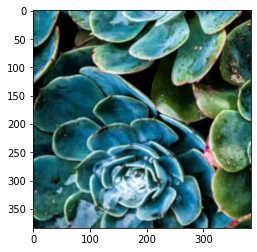

In [5]:
imshow(Image.open('flower.png', 'r'))

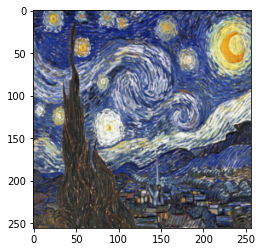

In [4]:
imshow(Image.open('style.png', 'r'))

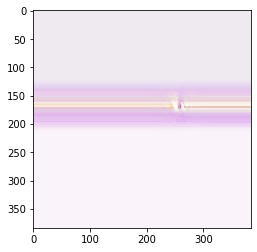

In [19]:
RES = !cargo run --bin rune  -- run ./style_transfer.rune --image image.png --image style.png
result = json.loads(RES[-1].split('Serial: ')[-1])['elements']
arr = np.asarray(result) * 255
arr = arr.astype('uint8')
arr = np.reshape(arr, (384, 384, 3))
img = Image.fromarray(arr, 'RGB')

imshow(img)